1. Import modules

In [11]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [15]:
df = pd.read_csv("breastcancer.csv")

df.head()


,Class,Age,Menopause,Tumor Size,INV-Nodes,1de-Caps,Deg-Malig,Breast,Irradiat
0,0,35,0,32,1,1,3,0,1
1,0,45,0,22,1,1,2,1,1
2,0,45,0,22,1,1,2,0,1
3,0,65,1,17,1,1,2,1,1
4,0,45,0,2,1,1,2,1,1


In [16]:
df.Class.unique()

array([0, 1])

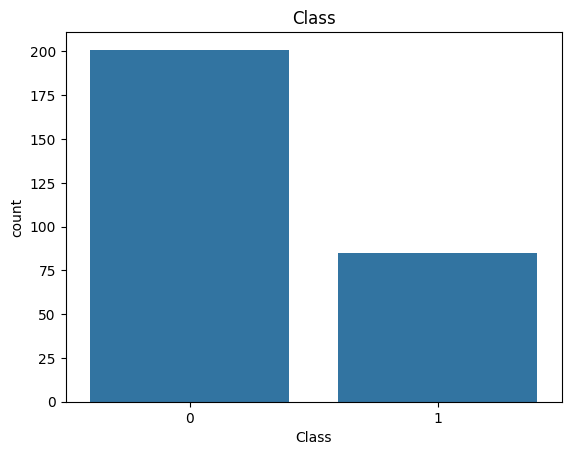

In [17]:
import seaborn as sns
sns.countplot(data=df, x='Class')
plt.title('Class')
plt.show()

In [18]:
print(df.groupby('Class').size())

Class
0    201
1     85
dtype: int64


2. Split the dataset into testing and training sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Class'], df['Class'],
stratify=df['Class'], random_state=66)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Class       286 non-null    int64
 1   Age         286 non-null    int64
 2   Menopause   286 non-null    int64
 3   Tumor Size  286 non-null    int64
 4   INV-Nodes   286 non-null    int64
 5   1de-Caps    286 non-null    int64
 6   Deg-Malig   286 non-null    int64
 7   Breast      286 non-null    int64
 8   Irradiat    286 non-null    int64
dtypes: int64(9)
memory usage: 20.2 KB


3. Split the features and target variables

In [21]:
features = ['Age', 'Menopause', 'Tumor Size', 'INV-Nodes', '1de-Caps', 'Deg-Malig', 'Breast', 'Irradiat']

X = df[features] #input
y = df['Class'] #target

print(X)
print(y)

     Age  Menopause  Tumor Size  INV-Nodes  1de-Caps  Deg-Malig  Breast  \
0     35          0          32          1         1          3       0   
1     45          0          22          1         1          2       1   
2     45          0          22          1         1          2       0   
3     65          1          17          1         1          2       1   
4     45          0           2          1         1          2       1   
..   ...        ...         ...        ...       ...        ...     ...   
281   35          0          32          1         1          2       0   
282   35          0          22          1         1          3       0   
283   65          1          22          1         1          1       1   
284   45          1          32          5         1          3       0   
285   55          1          32          5         1          3       0   

     Irradiat  
0           1  
1           1  
2           1  
3           1  
4           1  
.. 

4. Model evaluation using Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.611


The accuracy of training set is 100% and testing set is 71.40%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will add a max_depth= 3 (limiting the depth/ branching of tree).

In [23]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.799
Accuracy on test set: 0.708


5. Feature Importance in Decision Trees

In [24]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.14911611 0.         0.26648787 0.15287189 0.         0.21670122
 0.10650167 0.10832125]


6. Visualization of feature importance

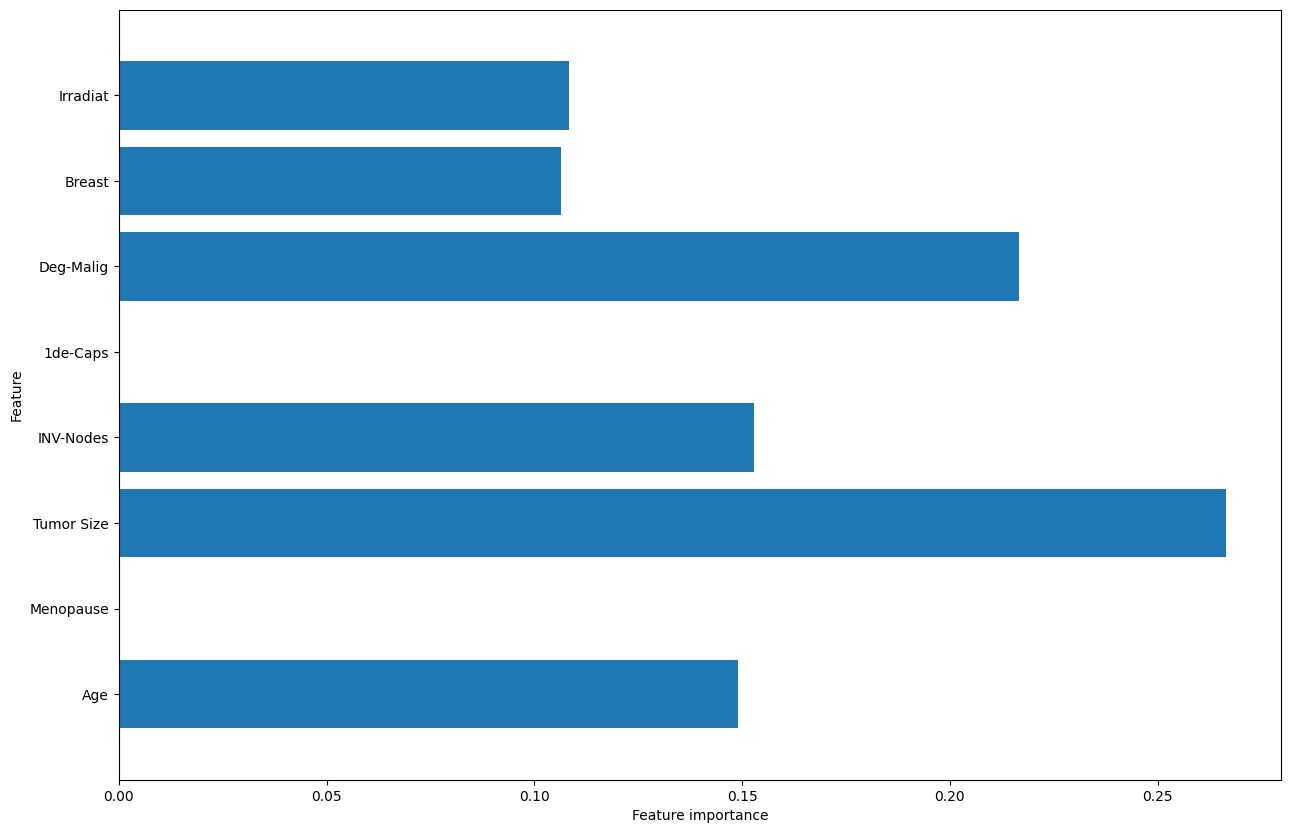

In [29]:
def plot_feature_importances_breastcancer(model):
    plt.figure(figsize=(15,10))
    n_features = 8  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features) #column names ; np.arange is phyton function
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_breastcancer(tree)

In [30]:
important_features = ['Age', 'Menopause', 'Tumor Size', 'INV-Nodes', '1de-Caps', 'Deg-Malig', 'Breast', 'Irradiat']
# columns that has value only, those has nothing are not listed
f = df[important_features] #input
t = df['Class'] #target

print(f)
print(t)

     Age  Menopause  Tumor Size  INV-Nodes  1de-Caps  Deg-Malig  Breast  \
0     35          0          32          1         1          3       0   
1     45          0          22          1         1          2       1   
2     45          0          22          1         1          2       0   
3     65          1          17          1         1          2       1   
4     45          0           2          1         1          2       1   
..   ...        ...         ...        ...       ...        ...     ...   
281   35          0          32          1         1          2       0   
282   35          0          22          1         1          3       0   
283   65          1          22          1         1          1       1   
284   45          1          32          5         1          3       0   
285   55          1          32          5         1          3       0   

     Irradiat  
0           1  
1           1  
2           1  
3           1  
4           1  
.. 

7. Create decision tree using important features

In [31]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')


True

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- Deg-Malig <= 2.50
|   |--- Tumor Size <= 14.50
|   |   |--- Age <= 40.00
|   |   |   |--- class: 0
|   |   |--- Age >  40.00
|   |   |   |--- class: 0
|   |--- Tumor Size >  14.50
|   |   |--- 1de-Caps <= 0.50
|   |   |   |--- class: 0
|   |   |--- 1de-Caps >  0.50
|   |   |   |--- class: 0
|--- Deg-Malig >  2.50
|   |--- INV-Nodes <= 2.00
|   |   |--- Tumor Size <= 24.50
|   |   |   |--- class: 0
|   |   |--- Tumor Size >  24.50
|   |   |   |--- class: 1
|   |--- INV-Nodes >  2.00
|   |   |--- Tumor Size <= 42.00
|   |   |   |--- class: 1
|   |   |--- Tumor Size >  42.00
|   |   |   |--- class: 0

